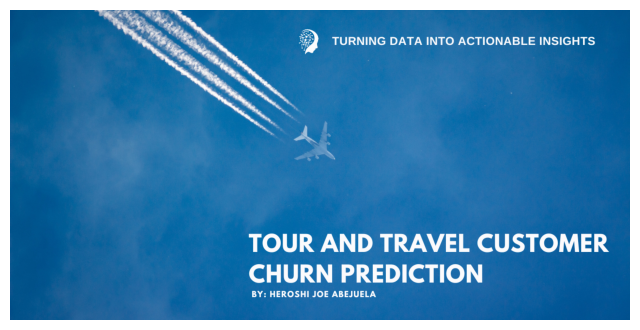

In [35]:
from PIL import Image
import matplotlib.pyplot as plt


image_path = '/content/TOUR AND TRAVEL CUSTOMER CHURN PREDICTION.png'
image = Image.open(image_path)


plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.axis('off')
plt.show()

### **TOUR AND TRAVEL CUSTOMER CHURN PREDICTION**

In the competitive tour and travel industry, retaining customers is crucial for long-term success. Predicting customer churn enables businesses to identify those at risk of leaving, allowing them to implement proactive retention strategies.

### **Business Problem**

The goal was to build a predictive model that identifies customers likely to churn. By predicting churn, companies can optimize their resources and focus on keeping at-risk customers, ultimately reducing revenue loss.

### **Steps Taken**

1. **Data Exploration**:
   - Analyzed the dataset to detect patterns.

2. **Data Preprocessing**:
   - Converted categorical variables to numerical ones using Label Encoding.
   - Scaled features like `Age` and `ServicesOpted` for better model accuracy.

3. **Model Building**:
   - Compared three models: **Logistic Regression**, **Random Forest**, and **Decision Tree**.
   - Evaluated each model based on metrics like accuracy, precision, recall, and F1-score.

4. **Feature Importance Analysis**:
   - Identified key factors influencing churn, with `ServicesOpted` and `FrequentFlyer` being the most significant.

5. **Interactivity**:
   - Developed an interactive tool using the best model, allowing users to predict customer churn based on input data.

### **Results and Statistics**

- The **Decision Tree** emerged as the best model with **91% accuracy**.
- The top predictors of churn were **`ServicesOpted`**, followed by **`FrequentFlyer`** and **`Age`**.

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

#For Interactivity
import ipywidgets as widgets
from IPython.display import display, HTML

#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Download Data Set
!kaggle datasets download -d tejashvi14/tour-travels-customer-churn-prediction

Dataset URL: https://www.kaggle.com/datasets/tejashvi14/tour-travels-customer-churn-prediction
License(s): CC0-1.0
  0% 0.00/3.45k [00:00<?, ?B/s]
100% 3.45k/3.45k [00:00<00:00, 4.90MB/s]


In [3]:
#Unzip Data Set
!unzip tour-travels-customer-churn-prediction.zip

Archive:  tour-travels-customer-churn-prediction.zip
  inflating: Customertravel.csv      


In [4]:
# Load the dataset
df = pd.read_csv('Customertravel.csv')

# Display the first few rows
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [5]:
# Check for missing values
print(df.isnull().sum())

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64


No missing values therefore we proceed.

In [6]:
# Check the data types and null values
print(df.info())

# Statistical summary
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB
None
              Age  ServicesOpted      Target
count  954.000000     954.000000  954.000000
mean    32.109015       2.437107    0.234801
std      3.337388       1.606233    0.424097
min     27.000000       1.000000    0.000000
25%     30.000000       1.000000    0.000000
50%     31.000000       2.000000    0.000000
75%     35.000000    

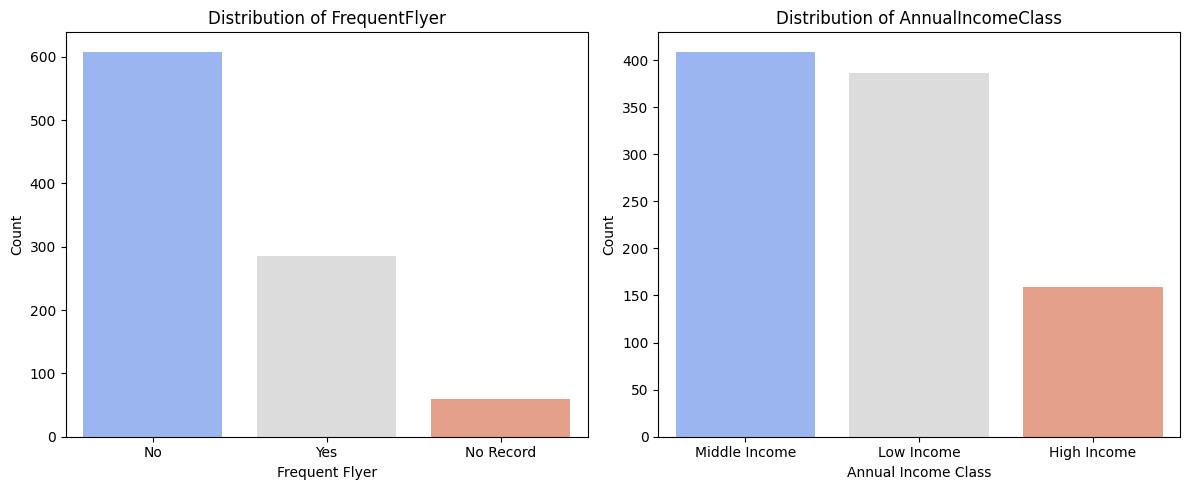

In [7]:
# Plot Distributions of Categorical Data
plt.figure(figsize=(12, 5))

# Plot distribution of 'FrequentFlyer'
plt.subplot(1, 2, 1)
sns.countplot(x='FrequentFlyer', data=df, palette='coolwarm')
plt.title('Distribution of FrequentFlyer')
plt.xlabel('Frequent Flyer')
plt.ylabel('Count')

# Plot distribution of 'AnnualIncomeClass'
plt.subplot(1, 2, 2)
sns.countplot(x='AnnualIncomeClass', data=df, palette='coolwarm')
plt.title('Distribution of AnnualIncomeClass')
plt.xlabel('Annual Income Class')
plt.ylabel('Count')

# Show the plots
plt.tight_layout()
plt.show()

In this data set we have a majority of No frequent flyers and Middle Income class.

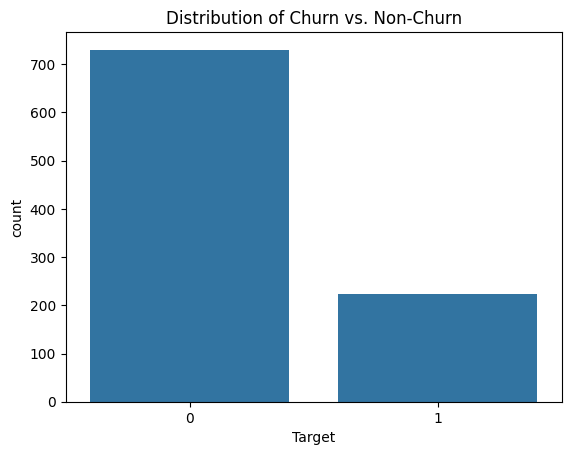

In [8]:
# Plot distribution of churn vs. non-churn (Numeric)
sns.countplot(x='Target', data=df)
plt.title('Distribution of Churn vs. Non-Churn')
plt.show()

This data set contains a majority of customers who did not churn.

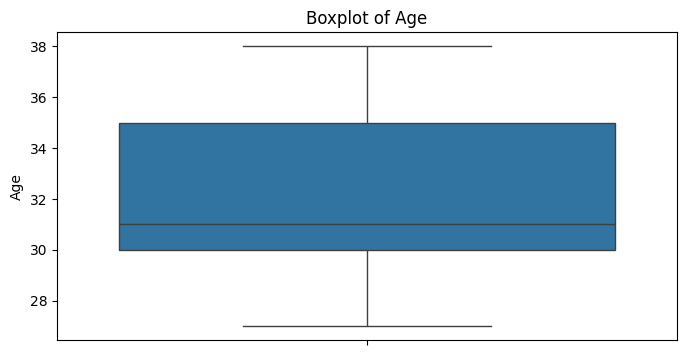

In [9]:
# Visualize potential outliers in Age
numerical_columns = ['Age']

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

The age ranges from 27 to 38 with a median of 31 with no noticeable outliers.

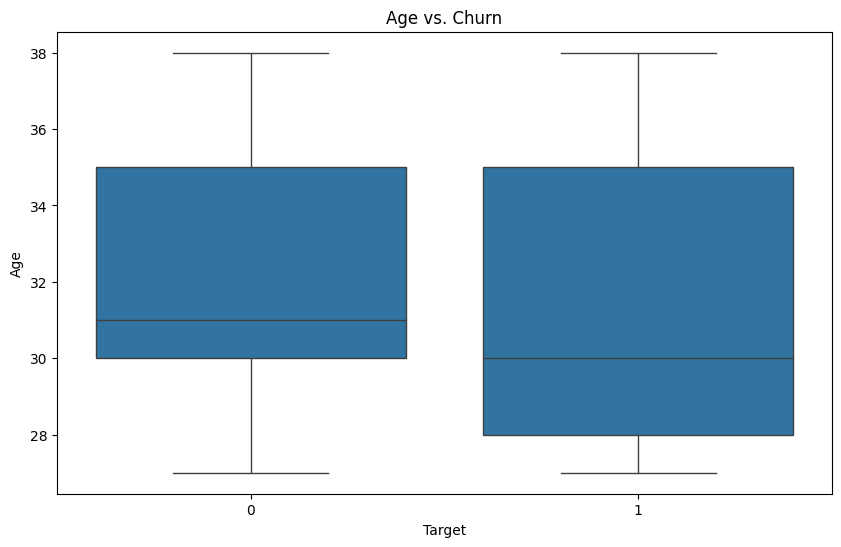

In [10]:
# Relationship between Age and Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='Age', data=df)
plt.title('Age vs. Churn')
plt.show()

The box plot shows that while the age ranges of customers who churned and those who didn't largely overlap (28-35 vs. 30-35), the churned group skews slightly younger with a median age of 30 compared to 31 for the non-churned group.

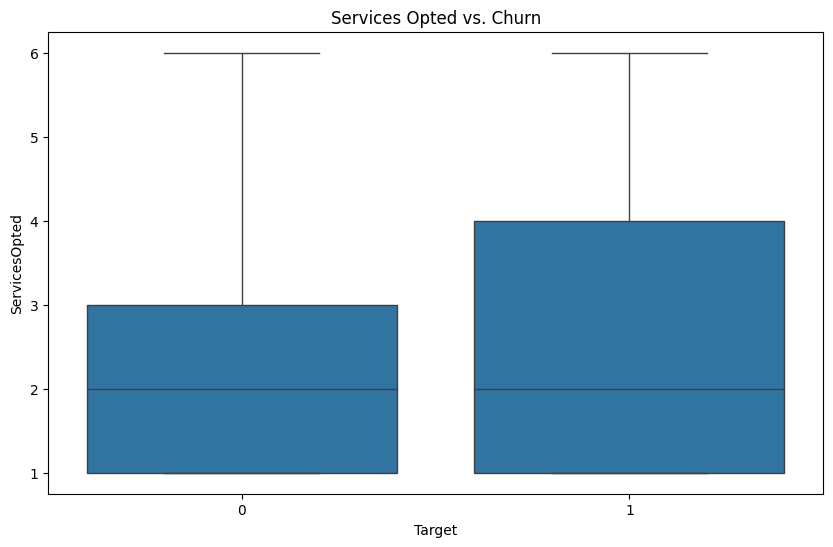

In [11]:
# Relationship between Services Opted and Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='ServicesOpted', data=df)
plt.title('Services Opted vs. Churn')
plt.show()

The median number of services opted for by customers who churned is higher than those who did not. This suggests that customers who opt for more services may be more likely to churn.

In [12]:
# Convert categorical variables to numerical using LabelEncoder
le = LabelEncoder()
df['FrequentFlyer'] = le.fit_transform(df['FrequentFlyer'])
df['AnnualIncomeClass'] = le.fit_transform(df['AnnualIncomeClass'])
df['AccountSyncedToSocialMedia'] = le.fit_transform(df['AccountSyncedToSocialMedia'])
df['BookedHotelOrNot'] = le.fit_transform(df['BookedHotelOrNot'])

# Preview the data after encoding
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,0,2,6,0,1,0
1,34,2,1,5,1,0,1
2,37,0,2,3,1,0,0
3,30,0,2,2,0,0,0
4,30,0,1,1,0,0,0


All values are now numerical which is appropriate for training our model.

In [13]:
scaler = StandardScaler()

# Scale 'Age' and 'ServicesOpted'
df[['Age', 'ServicesOpted']] = scaler.fit_transform(df[['Age', 'ServicesOpted']])

Using a scaler to scale the values in order to have a mean of 0 and a standard deviation of 1. This standardization helps ensure that features contribute equally to the model, especially when they have different units or scales.

In [14]:
# Define features (X) and target (y)
X = df.drop(columns='Target')
y = df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training Set Size: {X_train.shape}, Test Set Size: {X_test.shape}')

Training Set Size: (763, 6), Test Set Size: (191, 6)


Partitioned the data into train and test set.

In [15]:
# Initialize and train the model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Results:
[[144   9]
 [ 17  21]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       153
           1       0.70      0.55      0.62        38

    accuracy                           0.86       191
   macro avg       0.80      0.75      0.77       191
weighted avg       0.86      0.86      0.86       191



In [16]:
# Initialize and train the model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Predict and evaluate
y_pred_decision_tree = decision_tree.predict(X_test)
print("Decision Tree Results:")
print(confusion_matrix(y_test, y_pred_decision_tree))
print(classification_report(y_test, y_pred_decision_tree))

Decision Tree Results:
[[148   5]
 [ 13  25]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       153
           1       0.83      0.66      0.74        38

    accuracy                           0.91       191
   macro avg       0.88      0.81      0.84       191
weighted avg       0.90      0.91      0.90       191



In [17]:
# Initialize and train the model
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Predict and evaluate
y_pred_random_forest = random_forest.predict(X_test)
print("Random Forest Results:")
print(confusion_matrix(y_test, y_pred_random_forest))
print(classification_report(y_test, y_pred_random_forest))

Random Forest Results:
[[145   8]
 [ 14  24]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       153
           1       0.75      0.63      0.69        38

    accuracy                           0.88       191
   macro avg       0.83      0.79      0.81       191
weighted avg       0.88      0.88      0.88       191



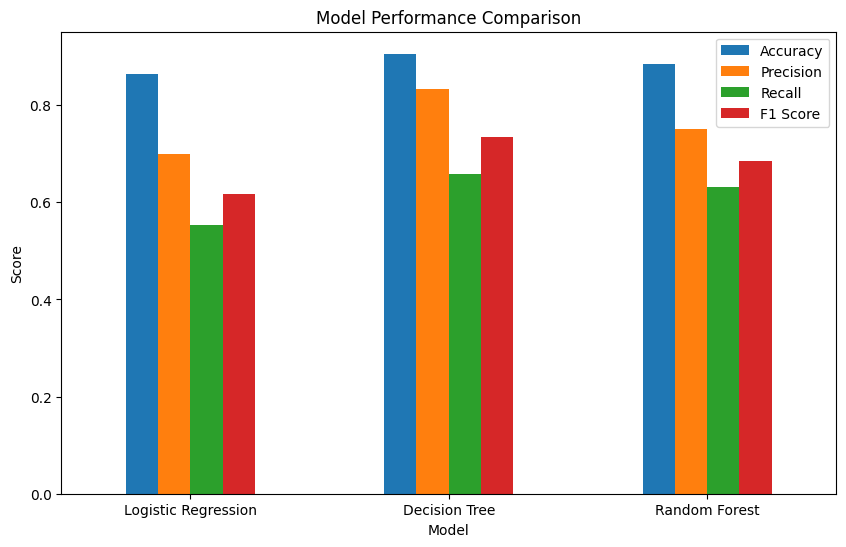

In [18]:
# Define a function to calculate and store metrics
def model_performance(model_name, y_test, y_pred):
    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

# Collect performance data
performance_data = [
    model_performance('Logistic Regression', y_test, y_pred_log_reg),
    model_performance('Decision Tree', y_test, y_pred_decision_tree),
    model_performance('Random Forest', y_test, y_pred_random_forest)
]

# Convert to DataFrame for easier plotting
import pandas as pd
performance_df = pd.DataFrame(performance_data)

# Plotting
performance_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()

In [19]:
# Find the best model based on F1 Score
best_model = performance_df.loc[performance_df['F1 Score'].idxmax()]
print(f"Best Model: {best_model['Model']}")

Best Model: Decision Tree


The F1 score was chosen to evaluate the model because it balances precision and recall, making it particularly useful for imbalanced datasets. The Decision Tree model achieved an F1 score of 0.94 for class 0 and 0.74 for class 1, with an overall weighted average F1 score of 0.90, indicating strong performance across both classes.

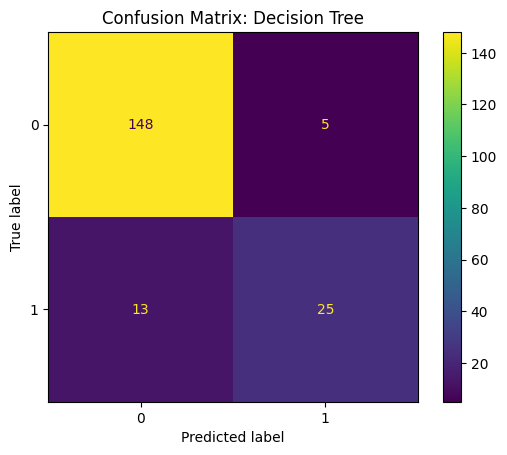

In [20]:
# Decision Tree with 91% Accuracy
y_pred_best = y_pred_decision_tree

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best)
plt.title(f'Confusion Matrix: {best_model["Model"]}')
plt.show()

**Interpretation**

- **Accuracy**: 91% – The model correctly predicts churn or non-churn 91% of the time.
- **Non-Churn (Class 0)**:
  - **Precision**: 92% – High accuracy in predicting non-churn.
  - **Recall**: 97% – Very effective at identifying non-churning customers.
- **Churn (Class 1)**:
  - **Precision**: 83% – Good accuracy in predicting churn, but less precise than for non-churn.
  - **Recall**: 66% – Less effective at identifying churning customers.

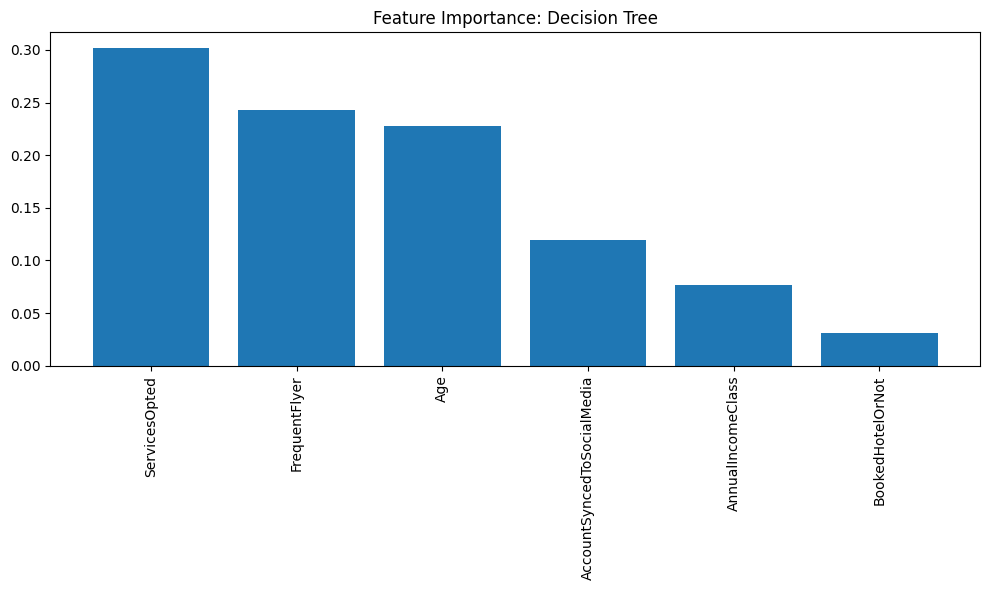

In [21]:
# Plot feature importance
if best_model['Model'] in ['Decision Tree']:
    feature_importance = decision_tree.feature_importances_  #Using Decision Tree (Best Model)
    features = X.columns

    # Sort feature importances in descending order
    indices = np.argsort(feature_importance)[::-1]

    # Plot feature importances
    plt.figure(figsize=(10, 6))
    plt.title(f'Feature Importance: {best_model["Model"]}')
    plt.bar(range(X.shape[1]), feature_importance[indices], align='center')
    plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

The feature importance ranking of the Decision Tree model shows how each factor influences the prediction of customer churn. Each feature contributes to the models prediction either weak or strong influence.

### Feature Importance

1. **ServicesOpted (Most Important)**:
   - **Impact**: The number of times a customer opts for services in recent years is the strongest predictor of churn. Customers who frequently utilize services are less likely to churn, indicating that high engagement with the company's services is associated with loyalty. Strategies to increase service usage or reward frequent users could help improve retention.

2. **FrequentFlyer (Second Most Important)**:
   - **Impact**: Whether a customer takes frequent flights remains a crucial predictor. Frequent flight customers are typically more engaged and invested in the company's offerings, making them less likely to leave. Enhancing services or benefits for frequent flyers could further reduce churn.

3. **Age (Third Most Important)**:
   - **Impact**: Age continues to be a significant factor in churn prediction. Different age groups may have varying levels of engagement and different reasons for leaving. Tailoring marketing efforts and retention strategies to age demographics could be beneficial.

4. **AccountSyncedToSocialMedia (Fourth)**:
   - **Impact**: Customers with accounts synced to social media platforms show better engagement and lower churn rates. Social media connectivity might reflect higher engagement or better communication with the company, which helps in retaining customers.

5. **AnnualIncomeClass (Fifth)**:
   - **Impact**: Income classification has a moderate effect on churn. Customers in different income brackets may use services differently, impacting their likelihood to churn. Understanding income-related usage patterns can help in customizing offers and improving retention.

6. **BookedHotelOrNot (Least Important)**:
   - **Impact**: Booking a hotel has the least impact on predicting churn. Although relevant, it does not provide as strong a signal for churn as the other features. It might be useful in combination with other factors but is less critical on its own.

### Actionable Insights
To effectively reduce customer churn:
- **Increase Service Usage**: Focus on strategies to boost the frequency of service usage, as this is the strongest predictor of customer retention.
- **Engage Frequent Flyers**: Maintain and enhance benefits for customers who frequently take flights to keep them loyal.
- **Tailor to Age Groups**: Customize marketing and retention strategies based on age demographics to address the specific needs and preferences of different age groups.
- **Utilize Social Media**: Leverage social media engagement to maintain better relationships with customers and enhance their experience.
- **Consider Income Levels**: Develop strategies considering income levels to address different spending capabilities and service usage patterns.

# **Interactivity**

- Using our top-performing Decision Tree model, this tool allows users to input customer data and receive instant churn predictions, enabling proactive measures to improve customer retention and satisfaction.

In [22]:
# Define style
style = {'description_width': 'initial'}
layout = widgets.Layout(width='400px')  # Adjust width

# Input widgets
age_widget = widgets.IntSlider(description="Age:", value=30, min=27, max=38, style=style, layout=layout)
frequent_flyer_widget = widgets.Dropdown(options=[('No', 0), ('No Record', 1), ('Yes', 2)], description="Frequent Flyer:", style=style, layout=layout)
income_class_widget = widgets.Dropdown(options=[('High Income', 0), ('Low Income', 1), ('Middle Income', 2)], description="Income Class:", style=style, layout=layout)
services_opted_widget = widgets.IntSlider(min=1, max=6, description="Services Opted:", style=style, layout=layout)
account_synced_widget = widgets.Dropdown(options=[('No', 0), ('Yes', 1)], description="Account Synced to Social Media:", style=style, layout=layout)
booked_hotel_widget = widgets.Dropdown(options=[('No', 0), ('Yes', 1)], description="Booked Hotel:", style=style, layout=layout)

# Button and result label
button = widgets.Button(description="Predict Churn")
result_label = widgets.HTML(value="")

# Scale user input for Age and ServicesOpted before prediction
def on_button_click(b):
    # Capture user input
    input_data = pd.DataFrame({
        'Age': [age_widget.value],
        'FrequentFlyer': [frequent_flyer_widget.value],
        'AnnualIncomeClass': [income_class_widget.value],
        'ServicesOpted': [services_opted_widget.value],
        'AccountSyncedToSocialMedia': [account_synced_widget.value],
        'BookedHotelOrNot': [booked_hotel_widget.value]
    })

    # Apply scaling to 'Age' and 'ServicesOpted'
    input_data[['Age', 'ServicesOpted']] = scaler.transform(input_data[['Age', 'ServicesOpted']])

    # Make the prediction using the decision tree model
    prediction = decision_tree.predict(input_data)

    # Display the result
    if prediction[0] == 1:
        result_label.value = "<h3 style='color:red; font-size:24px;'>The customer is likely to churn.</h3>"
    else:
        result_label.value = "<h3 style='color:green; font-size:24px;'>The customer is not likely to churn.</h3>"

# Connect the button to the function
button.on_click(on_button_click)

# Display the form
display(age_widget, frequent_flyer_widget, income_class_widget, services_opted_widget, account_synced_widget, booked_hotel_widget, button, result_label)

IntSlider(value=30, description='Age:', layout=Layout(width='400px'), max=38, min=27, style=SliderStyle(descri…

Dropdown(description='Frequent Flyer:', layout=Layout(width='400px'), options=(('No', 0), ('No Record', 1), ('…

Dropdown(description='Income Class:', layout=Layout(width='400px'), options=(('High Income', 0), ('Low Income'…

IntSlider(value=1, description='Services Opted:', layout=Layout(width='400px'), max=6, min=1, style=SliderStyl…

Dropdown(description='Account Synced to Social Media:', layout=Layout(width='400px'), options=(('No', 0), ('Ye…

Dropdown(description='Booked Hotel:', layout=Layout(width='400px'), options=(('No', 0), ('Yes', 1)), style=Des…

Button(description='Predict Churn', style=ButtonStyle())

HTML(value='')

**Recommendations**

For future work, addressing the class imbalance through methods like SMOTE or undersampling will enhance the model’s ability to predict churn more accurately. Additionally, incorporating more detailed features, such as customer flight frequency and service usage trends, could provide better insights into churn patterns. Exploring external factors, such as seasonality and competitive pricing, may further refine the model’s performance and offer a comprehensive approach to customer retention strategies. These improvements will help optimize predictive accuracy and provide actionable insights for businesses.

### **More Projects and Contact Information**

For more details on my projects and work, please visit my [GitHub profile](https://github.com/HiroshiJoe). You can also connect with me on [LinkedIn](https://www.linkedin.com/in/heroshi-joe-abejuela-513413314/) for professional updates and networking.

Feel free to reach out if you have any questions or would like to discuss potential collaborations!